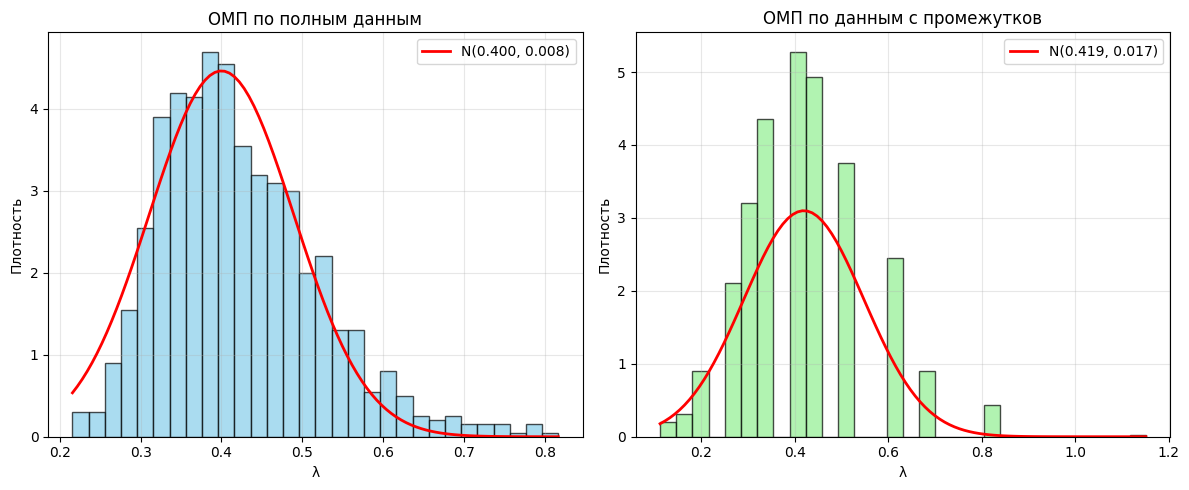

Истинное λ: 0.4000
Полные данные: среднее = 0.4214, среднекв. отклонение = 0.0970
Данные с промежутков: среднее = 0.4193, среднекв. отклонение = 0.1287


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

name_letters = 4  # Глеб
surname_letters = 10  # Милославов
lambda_true = name_letters / surname_letters

N = 1000
n = 20

np.random.seed(42)
samples = expon(scale=1/lambda_true).rvs(size=(N, n))

lambda_estimates_full = 1 / np.mean(samples, axis=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(lambda_estimates_full, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

x = np.linspace(lambda_estimates_full.min(), lambda_estimates_full.max(), 100)
pdf_normal = norm(loc=lambda_true, scale=lambda_true/np.sqrt(n)).pdf(x)
plt.plot(x, pdf_normal, 'r-', linewidth=2, label=f'N({lambda_true:.3f}, {lambda_true**2/n:.3f})')

plt.xlabel('λ')
plt.ylabel('Плотность')
plt.title('ОМП по полным данным')
plt.legend()
plt.grid(True, alpha=0.3)

def estimate_lambda_censored(sample):
    n1 = np.sum(sample <= 1)  # [0, 1]
    n2 = np.sum((sample > 1) & (sample <= 2))  # (1, 2]
    
    if n1 + n2 == n:
        return -0.5 * np.log(1 - (n1 + n2 - 0.5) / n)
    
    return -0.5 * np.log(1 - (n1 + n2) / n)

lambda_estimates_censored = np.array([estimate_lambda_censored(sample) for sample in samples])

plt.subplot(1, 2, 2)
plt.hist(lambda_estimates_censored, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

mean_censored = np.mean(lambda_estimates_censored)
std_censored = np.std(lambda_estimates_censored)
x_censored = np.linspace(lambda_estimates_censored.min(), lambda_estimates_censored.max(), 100)
pdf_normal_censored = norm(loc=mean_censored, scale=std_censored).pdf(x_censored)
plt.plot(x_censored, pdf_normal_censored, 'r-', linewidth=2, 
         label=f'N({mean_censored:.3f}, {std_censored**2:.3f})')

plt.xlabel('λ')
plt.ylabel('Плотность')
plt.title('ОМП по данным с промежутков')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Истинное λ: {lambda_true:.4f}")
print(f"Полные данные: среднее = {np.mean(lambda_estimates_full):.4f}, "
      f"среднекв. отклонение = {np.std(lambda_estimates_full):.4f}")
print(f"Данные с промежутков: среднее = {mean_censored:.4f}, "
      f"среднекв. отклонение = {std_censored:.4f}")